In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

import torch.nn.functional
sns.set_theme(font_scale=.8)

In [2]:
%cd ..

/home/matier/work/dphil/deep-ltl


/home/matier/miniconda3/envs/deepltl-dmc/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
def smooth(row, radius):
    """
    Computes the moving average over the given row of data. Returns an array of the same shape as the original row.
    """
    y = np.ones(radius)
    z = np.ones(len(row))
    return np.convolve(row, y, 'same') / np.convolve(z, y, 'same')

In [4]:
def process_logs(env, experiment, smooth_radius=100):
    path = f'experiments/ppo/{env}/{experiment}'
    seeds = [int(x) for x in os.listdir(path) if os.path.isdir(f'{path}/{x}') and str.isnumeric(x)]
    dfs = []
    for seed in seeds:
        df = pd.read_csv(f'{path}/{seed}/log.csv')
        df['alg'] = experiment
        df['return'] = df['return_per_episode_mean']
        df['seed'] = seed
        for col in ['return', 'adr', 'arps']:
            df[f'{col}_smooth'] = smooth(df[col], smooth_radius)
        dfs.append(df)
    return pd.concat(dfs)

In [62]:
env = 'ltl_cartpole'
exp = 'first'
df = process_logs(env, exp, smooth_radius=10)

/tmp/ipykernel_79802/2189071179.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(df[df['num_steps'] <= 3_500_000], x='num_steps', y='return_smooth', kind='line', errorbar='sd', palette='tab10')


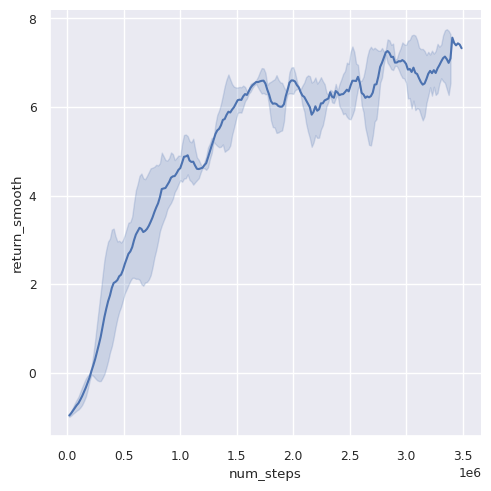

In [70]:
sns.relplot(df[df['num_steps'] <= 3_500_000], x='num_steps', y='return_smooth', kind='line', errorbar='sd', palette='tab10')
import matplotlib.pyplot as plt
plt.savefig(os.path.expanduser('~/tmp/plot.png'))

In [111]:
df['num_steps'].max()

5079040

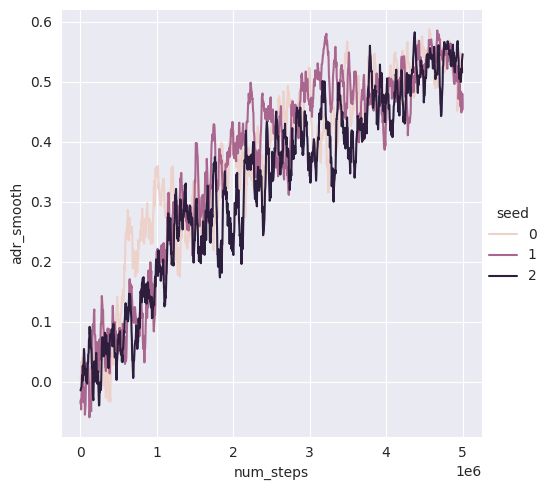

In [102]:
sns.relplot(df, x='num_steps', y='adr_smooth', kind='line', hue='seed')

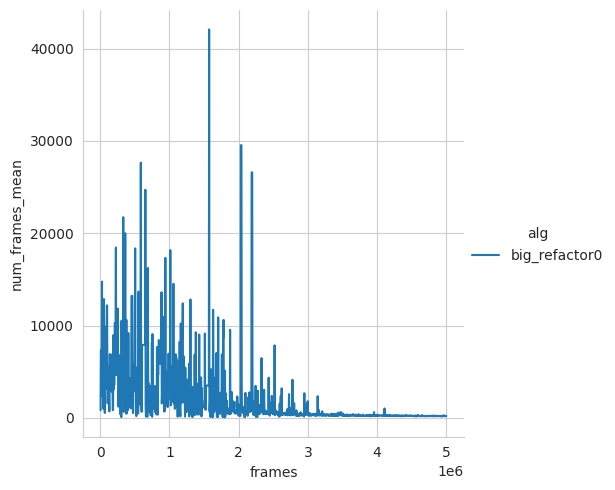

In [16]:
sns.relplot(df[df['alg'] =='big_refactor0'], x='frames', y='num_frames_mean', kind='line', hue='alg')

In [15]:
import torch

In [49]:
returns = torch.tensor([0.99, 0.95, 1, 0.2])
beta = 6
torch.nn.functional.softmax(beta * (1 - returns), dim=0, )

tensor([0.0085, 0.0108, 0.0080, 0.9727])